In [13]:
data = {
    'dotnet': {
        'url': 'http://localhost:5028/Member',
        'name': 'dotnet'
    },
    'django': {
        'url': 'http://localhost:8000/collisions',
        'name': 'django'
    },
    'nestjs': {
        'url': 'http://localhost:3000/member',
        'name': 'nestjs'
    },
}

## Run k6 test script

In [14]:
import os
from datetime import datetime

now = datetime.now()
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")
print("date and time =", dt_string)

dir_name = f'out_{dt_string}'
print(dir_name)
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
    
for key in data:
    fw = data[key]
    !k6 run  ../grafana-k6/script.js \
        --env vus=1 \
        --env url={fw['url']} \
        --out json={dir_name}/{fw['name']}.json \
        --out csv={dir_name}/{fw['name']}.csv

now = 2023-09-15 20:26:24.841976
date and time = 2023-09-15_20-26-24
out_2023-09-15_20-26-24

          /\      |‾‾| /‾‾/   /‾‾/   
     /\  /  \     |  |/  /   /  /    
    /  \/    \    |     (   /   ‾‾\  
   /          \   |  |\  \ |  (‾)  | 
  / __________ \  |__| \__\ \_____/ .io

  execution: local
     script: ../grafana-k6/script.js
     output: json (out_2023-09-15_20-26-24/dotnet.json), csv (out_2023-09-15_20-26-24/dotnet.csv)

  scenarios: (100.00%) 1 scenario, 1 max VUs, 1m0s max duration (incl. graceful stop):
           * default: 1 looping VUs for 30s (gracefulStop: 30s)


running (0m00.1s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.1s/30s

running (0m00.2s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.2s/30s

running (0m00.3s), 1/1 VUs, 0 complete and 0 interrupted iterations
default   [--------------------------------------] 1 VUs  00.3s

## Processing data

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np

In [16]:
dir = 'out_2023-09-15_20-26-24'
path =f'./{dir}/django.json'
print(path)
df = pd.read_csv(f'{dir}/django.csv')


./out_2023-09-15_20-26-24/django.json


In [17]:
df

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1694802423,1.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
1,http_req_duration,1694802423,22.139199,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
2,http_req_blocked,1694802423,0.837136,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
3,http_req_connecting,1694802423,0.471365,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
4,http_req_tls_handshaking,1694802423,0.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,vus_max,1694802453,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,data_sent,1694802453,224.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
695,data_received,1694802453,627.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN
696,iteration_duration,1694802453,1057.139788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,default,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
0,http_reqs,1694802423,1.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
1,http_req_duration,1694802423,22.139199,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
2,http_req_blocked,1694802423,0.837136,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
3,http_req_connecting,1694802423,0.471365,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
4,http_req_tls_handshaking,1694802423,0.000000,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   metric_name        698 non-null    object 
 1   timestamp          698 non-null    int64  
 2   metric_value       698 non-null    float64
 3   check              0 non-null      float64
 4   error              0 non-null      float64
 5   error_code         0 non-null      float64
 6   expected_response  522 non-null    object 
 7   group              0 non-null      float64
 8   method             522 non-null    object 
 9   name               522 non-null    object 
 10  proto              522 non-null    object 
 11  scenario           638 non-null    object 
 12  service            0 non-null      float64
 13  status             522 non-null    float64
 14  subproto           0 non-null      float64
 15  tls_version        0 non-null      float64
 16  url                522 non

In [45]:
df['metric_name'].unique()

array(['http_reqs', 'http_req_duration', 'http_req_blocked',
       'http_req_connecting', 'http_req_tls_handshaking',
       'http_req_sending', 'http_req_waiting', 'http_req_receiving',
       'http_req_failed', 'vus', 'vus_max', 'data_sent', 'data_received',
       'iteration_duration', 'iterations'], dtype=object)

[Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '58'),
 Text(0, 0, '30'),
 Text(0, 0, '30'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '29'),
 Text(0, 0, '29')]

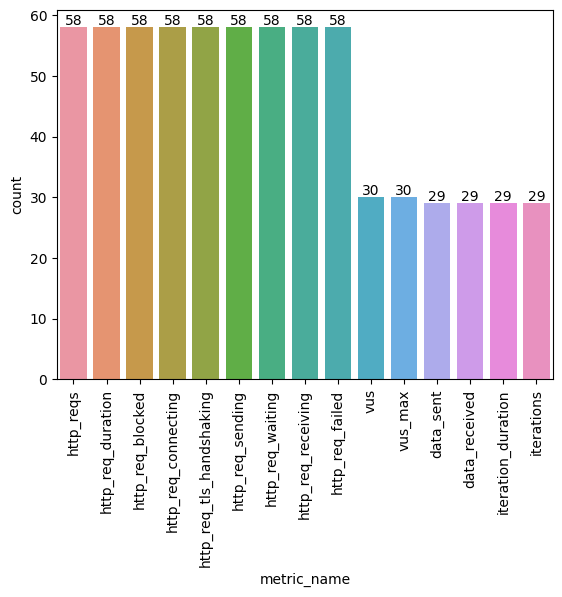

In [49]:
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])

In [40]:
df.shape

(698, 19)

In [41]:
df_1 = df.loc[(df['metric_name'] == 'http_req_duration')]
df_1.shape


(58, 19)

In [24]:
df_1.head()

,metric_name,timestamp,metric_value,check,error,error_code,expected_response,group,method,name,proto,scenario,service,status,subproto,tls_version,url,extra_tags,metadata
1,http_req_duration,1694802423,22.139199,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
10,http_req_duration,1694802423,19.253515,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
25,http_req_duration,1694802424,31.137244,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN
34,http_req_duration,1694802424,22.402402,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions/,HTTP/1.1,default,NaN,200.0,NaN,NaN,http://localhost:8000/collisions/,NaN,NaN
49,http_req_duration,1694802425,22.530333,NaN,NaN,NaN,True,NaN,GET,http://localhost:8000/collisions,HTTP/1.1,default,NaN,301.0,NaN,NaN,http://localhost:8000/collisions,NaN,NaN


<Axes: ylabel='metric_value'>

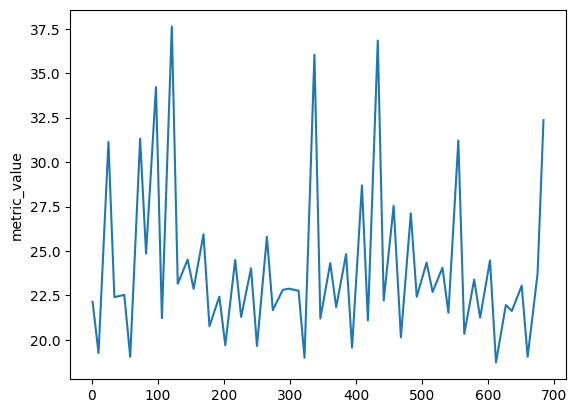

In [53]:
duration = df_1['metric_value']
sns.lineplot(data=duration)

In [38]:
df_1['metric_value'].mean()

24.088930327586205